100%|██████████| 1.55k/1.55k [00:00<00:00, 1.96MB/s]

Extracting files...
Dataset downloaded at: C:\Users\Rohith S D\.cache\kagglehub\datasets\vjchoudhary7\customer-segmentation-tutorial-in-python\versions\1
First 5 rows:
    CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


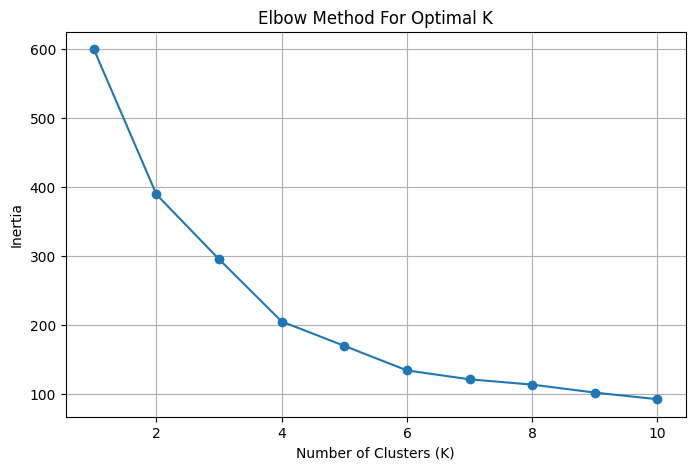

Silhouette Score for K=5: 0.41


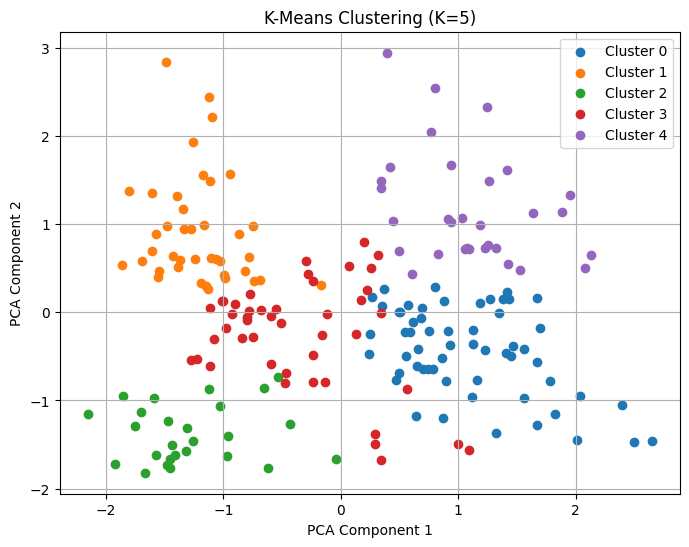

In [1]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Step 1: Download dataset using kagglehub
path = kagglehub.dataset_download("vjchoudhary7/customer-segmentation-tutorial-in-python")
print("Dataset downloaded at:", path)

# Step 2: Load dataset
csv_path = path + "/Mall_Customers.csv"
df = pd.read_csv(csv_path)

# Step 3: Explore & preprocess data
print("First 5 rows:\n", df.head())

# Drop CustomerID and Gender (or encode Gender if needed)
df_cleaned = df.drop(columns=["CustomerID", "Gender"])

# Optional: Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cleaned)

# Optional: PCA for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 4: Elbow Method to find optimal K
inertias = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertias, marker='o')
plt.title("Elbow Method For Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

# Step 5: Fit KMeans with optimal K (let’s say from Elbow it's 5)
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# Step 6: Evaluate using Silhouette Score
sil_score = silhouette_score(X_scaled, cluster_labels)
print(f"Silhouette Score for K={optimal_k}: {sil_score:.2f}")

# Step 7: Visualize Clusters (PCA)
plt.figure(figsize=(8, 6))
for i in range(optimal_k):
    plt.scatter(X_pca[cluster_labels == i, 0], X_pca[cluster_labels == i, 1], label=f'Cluster {i}')
    
plt.title(f"K-Means Clustering (K={optimal_k})")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.show()
